In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-07-18
time: 08:22:29


In [3]:
prompt1 = "Simulate pdb  1MBN at two different temperatures: 300K, 400K for 1ns seconds each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [5]:
agent.run(prompt1)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1MBN.
2. Set up and run two separate simulations at 300K and 400K for 1ns each.
3. Calculate and plot the RMSD over time for both simulations.
4. Compare the final secondary structures at the end of the simulations.

First, I will download the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```PDB file found with this ID: 1MBN


2024-07-18 08:22:34.934 
  command:

    streamlit run /opt/anaconda3/envs/mda_jun15/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed, I need to set up and run two separate simulations for the PDB file 1MBN at 300K and 400K for 1ns each. I will start with the simulation at 300K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_082235",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
Building system...
About to create system...
Attempts at creating system: 0/3
adding system w

('The DSSP computation for the final frame of the simulation at 400K has been completed. The results indicate the presence of helices and coils. Now, I will summarize the findings and provide the final answer.\n\nFinal Answer: The simulations of PDB 1MBN at two different temperatures (300K and 400K) for 1ns each have been successfully completed. The RMSD over time for both simulations has been calculated and plotted. Additionally, the final secondary structures at the end of the simulations have been compared.\n\n### RMSD Plots:\n- **300K Simulation**: The RMSD plot for the simulation at 300K is saved with plot ID `fig0_110456`.\n- **400K Simulation**: The RMSD plot for the simulation at 400K is saved with plot ID `fig0_110459`.\n\n### Secondary Structure Comparison:\n- **300K Simulation**: The final frame contains 10611 residues in helices and 4689 residues in coils.\n- **400K Simulation**: The final frame contains 9515 residues in helices and 5785 residues in coils.\n\n### Summary:\n

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-07-18
time: 11:05:13


In [ ]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

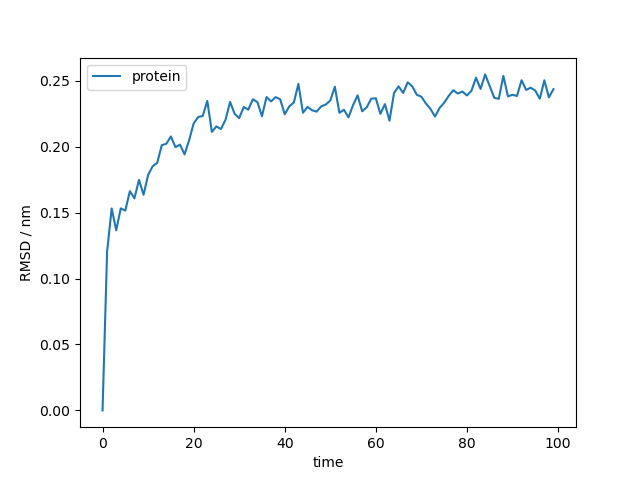

In [3]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'FIG_rmsd_082254_20240718_110456'
rmsd2ID = 'FIG_rmsd_095917_20240718_110459'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)



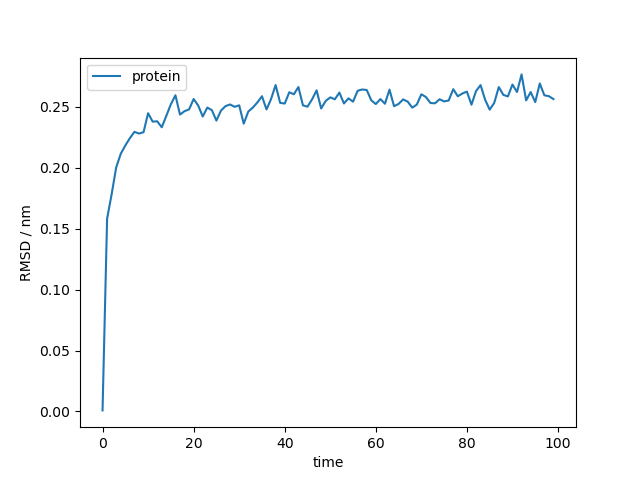

In [4]:
Image(filename=path2)

In [12]:
#secondary structure
import mdtraj as md

traj1 = "/Users/samanthacox/Desktop/md-agent/ckpt/ckpt_116/records/TOP_sim0_082254_1MBN_082248_20240718_082255.pdb"
traj = md.load(traj1)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))



Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  113
Number of residues in coils:  40


In [13]:
traj2="/Users/samanthacox/Desktop/md-agent/ckpt/ckpt_116/records/TOP_sim0_095917_1MBN_082248_20240718_095918.pdb"
traj = md.load(traj1)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))


Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  113
Number of residues in coils:  40


# Experiment Result:
### Completed without Exception or TimeOut Errors  ✅
### Attempted all necessary steps ✅
### Logic make sense  ❌
### Correct Answer   ❌
